In [12]:
from patchedimage import PatchedImage
from utilities import *

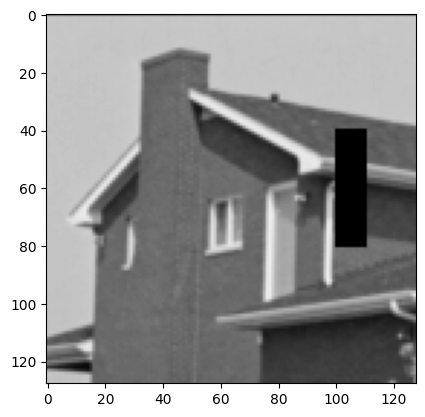

In [81]:
imgp = PatchedImage("images/maison-petit.tif",4)
masque = masque_carre((40,100),(80,110),imgp.img.shape)
imgp.set_masque(leaf_size=128,draw=False,masque=masque)
imgp.set_priorities()
imgp.show_img()

In [83]:
"""
plt.imshow(imgp.zone)
plt.colorbar()
plt.show()
plt.imshow(imgp.gradient[0])
plt.colorbar()
plt.show()
plt.imshow(imgp.gradient[1])
plt.colorbar()
plt.show()
"""

'\nplt.imshow(imgp.zone)\nplt.colorbar()\nplt.show()\nplt.imshow(imgp.gradient[0])\nplt.colorbar()\nplt.show()\nplt.imshow(imgp.gradient[1])\nplt.colorbar()\nplt.show()\n'

In [84]:
"""
i,j = imgp.find_max_priority()
imgp.reconstruction((i,j))
imgp.set_priorities()
plt.imshow(imgp.zone)
"""

'\ni,j = imgp.find_max_priority()\nimgp.reconstruction((i,j))\nimgp.set_priorities()\nplt.imshow(imgp.zone)\n'

In [85]:
for k in range(100):
    try:
        i,j = imgp.find_max_priority()
    except ValueError:
        break
    imgp.reconstruction((i,j))
    try:
        imgp.set_priorities()
    except ValueError:
        continue

bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)
bug à (56, 111)


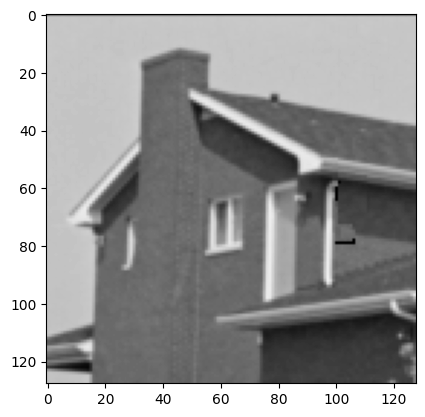

In [86]:
imgp.show_img()